In [13]:
from scipy import io as sio
from scipy.ndimage import imread
import matplotlib.image as mpimg
import os
import numpy as np
import matplotlib.pyplot as plt


In [33]:
groundtruth_path = './data/Groundtruth/Rectangular/Train'

files = os.listdir(groundtruth_path)
print files[2]
a = sio.loadmat(os.path.join(data_path, 'rect_gt_img776.mat'))
a


rect_gt_img367.mat


TypeError: 'NoneType' object is not iterable

/home/lyy/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


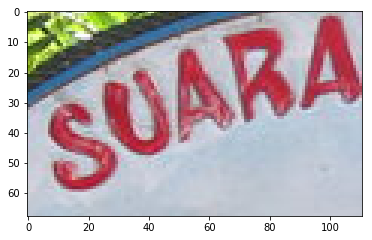

[array([[161]], dtype=int16) array([[84]], dtype=int16)
 array([[272]], dtype=int16) array([[152]], dtype=int16)
 array([[111]], dtype=int16) array([[68]], dtype=int16)
 array([u'SUARA'], dtype='<U5') array([u'c'], dtype='<U1')] (450, 600, 3)


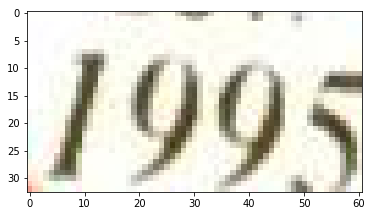

[array([[310]], dtype=int16) array([[350]], dtype=int16)
 array([[371]], dtype=int16) array([[383]], dtype=int16)
 array([[61]], dtype=int16) array([[33]], dtype=int16)
 array([u'1995'], dtype='<U4') array([u'h'], dtype='<U1')] (1024, 768, 3)


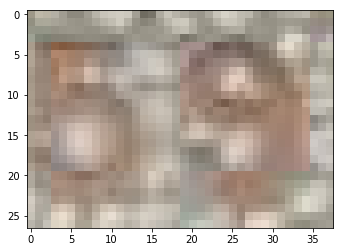

[array([[301]], dtype=int16) array([[284]], dtype=int16)
 array([[339]], dtype=int16) array([[311]], dtype=int16)
 array([[38]], dtype=int16) array([[27]], dtype=int16)
 array([u'59'], dtype='<U2') array([u'h'], dtype='<U1')] (1080, 608, 3)


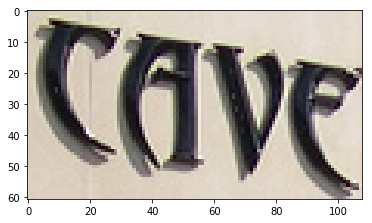

[array([[300]], dtype=int16) array([[166]], dtype=int16)
 array([[408]], dtype=int16) array([[227]], dtype=int16)
 array([[108]], dtype=int16) array([[61]], dtype=int16)
 array([u'cave'], dtype='<U4') array([u'm'], dtype='<U1')] (768, 1024, 3)


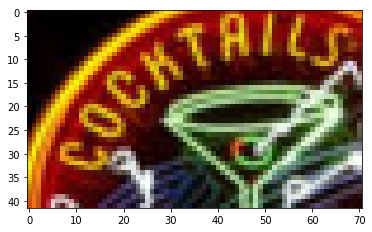

[array([[179]], dtype=int16) array([[22]], dtype=int16)
 array([[250]], dtype=int16) array([[64]], dtype=int16)
 array([[71]], dtype=int16) array([[42]], dtype=int16)
 array([u'COCKTAILS'], dtype='<U9') array([u'c'], dtype='<U1')] (270, 340, 3)


In [69]:
data_path = './data/Images/Train'
groundtruth_path = './data/Groundtruth/Rectangular/Train'
imgs = os.listdir(data_path)

def box(img, box):
    print box
    for i in range(box[1], box[3]+1):
        img[i, box[0]] = [255, 0, 0]
        img[i, box[2]] = [255, 0, 0]
    for i in range(box[0], box[2]+1):
        img[box[1], i] = [255, 0, 0]
        img[box[3], i] = [255, 0, 0]
    return img

for i in range(5, 10):
    b = sio.loadmat(os.path.join(groundtruth_path, 'rect_gt_%s.mat' % imgs[i].split('.')[0]))
    a = imread(os.path.join(data_path, imgs[i]))
    x_min, y_min, x_max, y_max = map(int, b['rectgt'][0][:4])
    plt.imshow(a[y_min:y_max, x_min:x_max])
    plt.show()
    print b['rectgt'][0], a.shape

In [63]:
class DataGenerator:
    def __init__(self, img_path, gt_path):
        self.img_path = img_path
        self.gt_path = gt_path
    